# Libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset

I will use MNIST Fashion Dataset. This is a dataset that is included in keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist #load datset

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data() #split into testing and training

In [5]:
train_images.shape

(60000, 28, 28)

We have 60000 images, 28*28 pixeles

In [6]:
train_images[0,23,23] #one pixel, (pixel values are between 0 and 255, 0 being black and 255 being white)

194

In [7]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Labels are integers ranging from 0-9. Each integer represents a specific article of clothing

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Showing one of the 60000 images

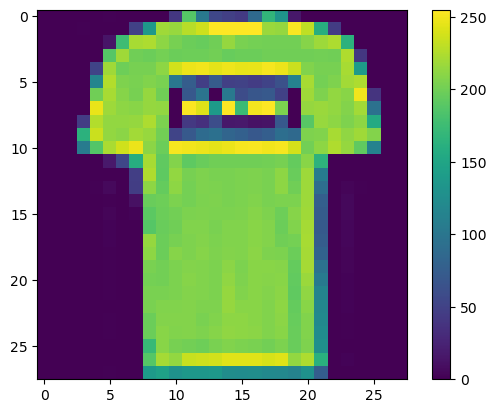

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

In this step, we scale all of our greyscale pixel values 0 - 255 to be between 0 and 1. This is because smaller values will make it easier for the model to process our values

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building the model

In [11]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(28,28)), #input layer (1) --> reshapes the input data into a one dimensional array of 784 elements
    keras.layers.Dense (128, activation='relu'), #hidden layer (2) --> every neuron in the previous layer are connected with this layer --> ReLu (linear transformation to the data)
    keras.layers.Dense(10,activation='softmax') #output layer (3) --> 10 neurons with the activation of softmax (convert the raw scores from the previous layers into probabilities that sum to 100%)

])

c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the model

In [12]:
model.compile(optimizer ='adam', #ajusta los pesos del modelo para minimizar la funcion de perdida
              loss='sparse_categorical_crossentropy', #identifica cuan bien se desempe;a el modelo, sparse.. se usa en problemas de clasificacion con etiquetas enteras
              metrics=['accuracy']) #metrica

# Training the model

In [17]:
model.fit(train_images, train_labels, epochs=1) 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9294 - loss: 0.1855


# Evaluating the model

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.3939
Test Accuracy:  0.8851000070571899


We can see that the accuracy evaluating the model is lower than the accuracy training the model (88% < 91%, so the model is OVERFITTING)
- We can change the number of epochs

# Making predictions

In [22]:
predictions = model.predict(test_images)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[5.55570381e-08 1.00840974e-10 8.10811542e-08 ... 1.00429705e-03
  2.31309571e-09 9.98634040e-01]
 [8.98356211e-06 6.68445622e-20 9.99961257e-01 ... 2.97140977e-26
  2.37971218e-18 1.24503334e-21]
 [4.10311202e-10 1.00000000e+00 1.37026490e-12 ... 8.94631605e-31
  3.92673003e-12 3.31504832e-28]
 ...
 [9.03787713e-06 3.24580775e-17 3.87417964e-09 ... 4.86057971e-13
  9.99989390e-01 2.01601881e-20]
 [2.49237297e-10 9.99999881e-01 5.21466065e-11 ... 6.21455831e-19
  1.55212770e-11 1.18502525e-18]
 [3.22447917e-08 1.29050390e-11 2.58698041e-09 ... 4.02418409e-05
  1.90135472e-06 3.57707854e-08]]


In [26]:
print(class_names[np.argmax(predictions[0])]) #the highest value in the list

Ankle boot


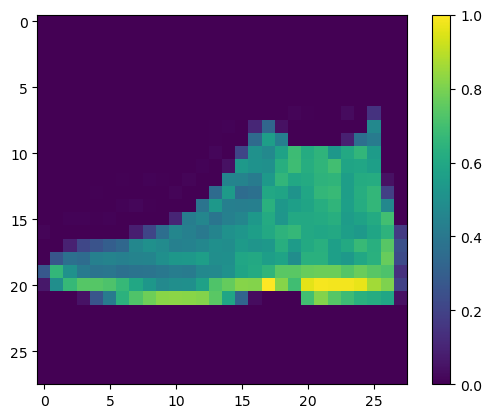

In [27]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Bag


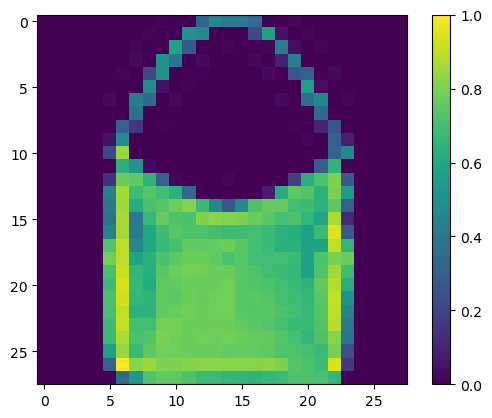

In [29]:
print(class_names[np.argmax(predictions[34])]) 
plt.figure()
plt.imshow(test_images[34])
plt.colorbar()
plt.grid(False)
plt.show()